# 10-714 Project: Needle-DAGMM

Needle (NEcessary Elements of Deep Learning) Implementation for the Deep Autoencoding Gaussian Mixture Model (DAGMM)

## Introduction

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
!mkdir -p 10714
%cd /content/drive/MyDrive/10714/project
!pip3 install pybind11

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
/content/drive/MyDrive/10714/project
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!make

-- Found pybind11: /usr/local/lib/python3.8/dist-packages/pybind11/include (found version "2.10.2")
-- Found cuda, building cuda backend
Wed Dec 28 00:10:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    29W /  70W |    138MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+------------------------------

In [32]:
import sys
sys.path.append('./python')

## Needle Framework

The following operators are implemented in `python/needle/ops.py`:

- `squeeze`
- `unsqueeze`
- `norm`
- `cosine_similarity`
- `pairwise_distance`
- `relative_distance`
- `softmax`
- `bmm`
- `Inverse` and `inv`
- `Det` and `det`
- `Phi` and `phi`
- `Cholesky` and `cholesky`



### Squeeze and Unsqueeze

The `needle.ops.squeeze` and `needle.ops.unsqueeze` are implemented to compute new tensors with dimensions removed or inserted at the specified position. These operator functions are verified by [`torch.squeeze`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) and [`torch.unsqueeze`](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html).

In [ ]:
!python3 -m pytest -l -v -k "op_squeeze"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 128 deselected                                           

tests/test_ops.py::test_op_squeeze[forward-cpu-x_shape0-None] PASSED     [  6%]
tests/test_ops.py::test_op_squeeze[forward-cpu-x_shape1-0] PASSED        [ 12%]
tests/test_ops.py::test_op_squeeze[forward-cpu-x_shape2-1] PASSED        [ 18%]
tests/test_ops.py::test_op_squeeze[forward-cpu-x_shape3-1] PASSED        [ 25%]
tests/test_ops.py::test_op_squeeze[forward-cuda-x_shape0-None] PASSED    [ 31%]
tests/test_ops.py::test_op_squeeze[forward-cuda-x_shape1-0] PASSED       [ 37%]
tests/test_ops.py::test_op_squeeze[forward-cuda-x_shape2-1] PASSED       [ 43%]
tests/test_ops.py::test_op_squeeze[forward-cuda-x_shape3-1] PASSED       [ 50%]
te

In [ ]:
!python3 -m pytest -l -v -k "op_unsqueeze"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 124 deselected                                           

tests/test_ops.py::test_op_unsqueeze[forward-cpu-x_shape0-0] PASSED      [  5%]
tests/test_ops.py::test_op_unsqueeze[forward-cpu-x_shape1-1] PASSED      [ 10%]
tests/test_ops.py::test_op_unsqueeze[forward-cpu-x_shape2-0] PASSED      [ 15%]
tests/test_ops.py::test_op_unsqueeze[forward-cpu-x_shape3-1] PASSED      [ 20%]
tests/test_ops.py::test_op_unsqueeze[forward-cpu-x_shape4-2] PASSED      [ 25%]
tests/test_ops.py::test_op_unsqueeze[forward-cuda-x_shape0-0] PASSED     [ 30%]
tests/test_ops.py::test_op_unsqueeze[forward-cuda-x_shape1-1] PASSED     [ 35%]
tests/test_ops.py::test_op_unsqueeze[forward-cuda-x_shape2-0] PASSED     [ 40%]
te

### Abs

The `needle.ops.abs` is implemented to compute the absolute value of each element in a tensor. This operator function is verified by [`torch.abs`](https://pytorch.org/docs/stable/generated/torch.abs.html).

In [ ]:
!python3 -m pytest -l -v -k "op_abs"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 132 deselected                                           

tests/test_ops.py::test_op_abs[forward-cpu-x_shape0] PASSED              [  8%]
tests/test_ops.py::test_op_abs[forward-cpu-x_shape1] PASSED              [ 16%]
tests/test_ops.py::test_op_abs[forward-cpu-x_shape2] PASSED              [ 25%]
tests/test_ops.py::test_op_abs[forward-cuda-x_shape0] PASSED             [ 33%]
tests/test_ops.py::test_op_abs[forward-cuda-x_shape1] PASSED             [ 41%]
tests/test_ops.py::test_op_abs[forward-cuda-x_shape2] PASSED             [ 50%]
tests/test_ops.py::test_op_abs[backward-cpu-x_shape0] PASSED             [ 58%]
tests/test_ops.py::test_op_abs[backward-cpu-x_shape1] PASSED             [ 66%]
te

### Norm

The `needle.ops.norm` is implemented to compute the vector norm of a tensor. This operator function is verified by [`torch.norm`](https://pytorch.org/docs/stable/generated/torch.norm.html).

In [ ]:
!python3 -m pytest -l -v -k "op_norm"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 132 deselected                                           

tests/test_ops.py::test_op_norm[forward-cpu-x_shape0-0] PASSED           [  8%]
tests/test_ops.py::test_op_norm[forward-cpu-x_shape1-0] PASSED           [ 16%]
tests/test_ops.py::test_op_norm[forward-cpu-x_shape2-1] PASSED           [ 25%]
tests/test_ops.py::test_op_norm[forward-cuda-x_shape0-0] PASSED          [ 33%]
tests/test_ops.py::test_op_norm[forward-cuda-x_shape1-0] PASSED          [ 41%]
tests/test_ops.py::test_op_norm[forward-cuda-x_shape2-1] PASSED          [ 50%]
tests/test_ops.py::test_op_norm[backward-cpu-x_shape0-0] PASSED          [ 58%]
tests/test_ops.py::test_op_norm[backward-cpu-x_shape1-0] PASSED          [ 66%]
te

### Cosine Similarity

The `needle.ops.cosine_similarity` is implemented to compute the cosine similarity of two vectors:
$$ \frac{\mathbf{x} \cdot \mathbf{x}'}{\lVert \mathbf{x} \rVert_2 \lVert \mathbf{x}' \rVert_2} . $$
This operator function is verified by [`torch.nn.functional.cosine_similarity`](https://pytorch.org/docs/stable/generated/torch.nn.functional.cosine_similarity.html).

In [ ]:
!python3 -m pytest -l -v -k "op_cosine_similarity"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 132 deselected                                           

tests/test_ops.py::test_op_cosine_similarity[forward-cpu-x_shape0-0] PASSED [  8%]
tests/test_ops.py::test_op_cosine_similarity[forward-cpu-x_shape1-0] PASSED [ 16%]
tests/test_ops.py::test_op_cosine_similarity[forward-cpu-x_shape2-1] PASSED [ 25%]
tests/test_ops.py::test_op_cosine_similarity[forward-cuda-x_shape0-0] PASSED [ 33%]
tests/test_ops.py::test_op_cosine_similarity[forward-cuda-x_shape1-0] PASSED [ 41%]
tests/test_ops.py::test_op_cosine_similarity[forward-cuda-x_shape2-1] PASSED [ 50%]
tests/test_ops.py::test_op_cosine_similarity[backward-cpu-x_shape0-0] PASSED [ 58%]
tests/test_ops.py::test_op_cosine_similarity[backward-cpu

### Pairwise Distance

The `needle.ops.pairwise_distance` is implemented to compute the pairwise distance between input vectors. This operator function is verified by [`torch.nn.functional.pairwise_distance`](https://pytorch.org/docs/stable/generated/torch.nn.functional.pairwise_distance.html).

In [ ]:
!python3 -m pytest -l -v -k "op_pairwise_distance"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 136 deselected                                           

tests/test_ops.py::test_op_pairwise_distance[forward-cpu-x_shape0-0] PASSED [ 12%]
tests/test_ops.py::test_op_pairwise_distance[forward-cpu-x_shape1-1] PASSED [ 25%]
tests/test_ops.py::test_op_pairwise_distance[forward-cuda-x_shape0-0] PASSED [ 37%]
tests/test_ops.py::test_op_pairwise_distance[forward-cuda-x_shape1-1] PASSED [ 50%]
tests/test_ops.py::test_op_pairwise_distance[backward-cpu-x_shape0-0] PASSED [ 62%]
tests/test_ops.py::test_op_pairwise_distance[backward-cpu-x_shape1-1] PASSED [ 75%]
tests/test_ops.py::test_op_pairwise_distance[backward-cuda-x_shape0-0] PASSED [ 87%]
tests/test_ops.py::test_op_pairwise_distance[backward-c

### Softmax

The `needle.ops.softmax` is implemented to apply the softmax function. This operator function is verified by [`torch.nn.functional.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html).

In [ ]:
!python3 -m pytest -l -v -k "op_softmax"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 132 deselected                                           

tests/test_ops.py::test_op_softmax[forward-cpu-x_shape0-0] PASSED        [  8%]
tests/test_ops.py::test_op_softmax[forward-cpu-x_shape1-1] PASSED        [ 16%]
tests/test_ops.py::test_op_softmax[forward-cpu-x_shape2-1] PASSED        [ 25%]
tests/test_ops.py::test_op_softmax[forward-cuda-x_shape0-0] PASSED       [ 33%]
tests/test_ops.py::test_op_softmax[forward-cuda-x_shape1-1] PASSED       [ 41%]
tests/test_ops.py::test_op_softmax[forward-cuda-x_shape2-1] PASSED       [ 50%]
tests/test_ops.py::test_op_softmax[backward-cpu-x_shape0-0] PASSED       [ 58%]
tests/test_ops.py::test_op_softmax[backward-cpu-x_shape1-1] PASSED       [ 66%]
te

### Batch Matrix Multiplication

The `needle.ops.bmm` is implemented to compute a batch matrix-matrix product of matrices. This operator function is verified by [`torch.bmm`](https://pytorch.org/docs/stable/generated/torch.bmm.html).

In [ ]:
!python3 -m pytest -l -v -k "op_bmm"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 136 deselected                                           

tests/test_ops.py::test_op_bmm[forward-cpu-A_shape0-B_shape0] PASSED     [ 12%]
tests/test_ops.py::test_op_bmm[forward-cpu-A_shape1-B_shape1] PASSED     [ 25%]
tests/test_ops.py::test_op_bmm[forward-cuda-A_shape0-B_shape0] PASSED    [ 37%]
tests/test_ops.py::test_op_bmm[forward-cuda-A_shape1-B_shape1] PASSED    [ 50%]
tests/test_ops.py::test_op_bmm[backward-cpu-A_shape0-B_shape0] PASSED    [ 62%]
tests/test_ops.py::test_op_bmm[backward-cpu-A_shape1-B_shape1] PASSED    [ 75%]
tests/test_ops.py::test_op_bmm[backward-cuda-A_shape0-B_shape0] PASSED   [ 87%]
tests/test_ops.py::test_op_bmm[backward-cuda-A_shape1-B_shape1] PASSED   [100%]

=

### Matrix Inverse

The `needle.ops.Inverse` and `needle.ops.inv` are implemented to compute the inverse of a square matrix. The reverse mode can be calculatedc by $ \bar{A} = - C^{T} \bar{C} C^{T} $, where $ C = A^{-1} $. This operator function is verified by [`torch.linalg.inv`](https://pytorch.org/docs/stable/generated/torch.linalg.inv.html).

In [ ]:
!python3 -m pytest -l -v -k "op_inv"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 136 deselected                                           

tests/test_ops.py::test_op_inv[forward-cpu-A_shape0] PASSED              [ 12%]
tests/test_ops.py::test_op_inv[forward-cpu-A_shape1] PASSED              [ 25%]
tests/test_ops.py::test_op_inv[forward-cuda-A_shape0] PASSED             [ 37%]
tests/test_ops.py::test_op_inv[forward-cuda-A_shape1] PASSED             [ 50%]
tests/test_ops.py::test_op_inv[backward-cpu-A_shape0] PASSED             [ 62%]
tests/test_ops.py::test_op_inv[backward-cpu-A_shape1] PASSED             [ 75%]
tests/test_ops.py::test_op_inv[backward-cuda-A_shape0] PASSED            [ 87%]
tests/test_ops.py::test_op_inv[backward-cuda-A_shape1] PASSED            [100%]

=

### Matrix Determinant

The `needle.ops.Det` and `needle.ops.det` are implemented to compute the determinant of a square matrix. The reverse mode can be calculatedc by $ \bar{A} = \bar{C} C A^{-T} $, where $ C = \text{det} A $. This operator function is verified by [`torch.linalg.det`](https://pytorch.org/docs/stable/generated/torch.linalg.det.html).

In [ ]:
!python3 -m pytest -l -v -k "op_det"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 136 deselected                                           

tests/test_ops.py::test_op_det[forward-cpu-A_shape0] PASSED              [ 12%]
tests/test_ops.py::test_op_det[forward-cpu-A_shape1] PASSED              [ 25%]
tests/test_ops.py::test_op_det[forward-cuda-A_shape0] PASSED             [ 37%]
tests/test_ops.py::test_op_det[forward-cuda-A_shape1] PASSED             [ 50%]
tests/test_ops.py::test_op_det[backward-cpu-A_shape0] PASSED             [ 62%]
tests/test_ops.py::test_op_det[backward-cpu-A_shape1] PASSED             [ 75%]
tests/test_ops.py::test_op_det[backward-cuda-A_shape0] PASSED            [ 87%]
tests/test_ops.py::test_op_det[backward-cuda-A_shape1] PASSED            [100%]

=

### Matrix Diagonal

The `needle.ops.Diagonal` and `needle.ops.diagonal` are implemented to get the diagonal of a square matrix. This operator function is verified by [`torch.diag`](https://pytorch.org/docs/stable/generated/torch.diag.html).

In [ ]:
!python3 -m pytest -l -v -k "op_diagonal"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 140 deselected                                           

tests/test_ops.py::test_op_diagonal[forward-cpu-A_shape0] PASSED         [ 25%]
tests/test_ops.py::test_op_diagonal[forward-cuda-A_shape0] PASSED        [ 50%]
tests/test_ops.py::test_op_diagonal[backward-cpu-A_shape0] PASSED        [ 75%]
tests/test_ops.py::test_op_diagonal[backward-cuda-A_shape0] PASSED       [100%]

=================== 4 passed, 140 deselected in 3.27 seconds ===================


### Cholesky Decomposition

The Cholesky decomposition a symmetric positive definite matrix $ \Sigma $ is to compute the unique lower-triangular matrix $ L $ with positive diagonal elements such that $ \Sigma = L L^{T} $. The reverse mode of the Cholesky decomposition can be obtained by $ \text{tril}{\bar{\Sigma}} = \Phi \left( L^{-T} \left( P + P^{T} \right) L^{-1} \right) $, where $ P = \Phi \left(L^{T} \bar{L} \right) $ and $ \Phi $ takes the lower-triangular part of a matrix and halves its diagonal:
$$
\Phi_{ij} (A) = \begin{cases}
A_{ij} & i > j \\
A_{ii} / 2 & i = j \\
0 & i < j
\end{cases} .
$$
The `needle.ops.Cholesky` and `needle.ops.cholesky` are implemented with auxiliary functions `needle.ops.Phi` and `needle.ops.phi`. This operator function is verified by [`torch.cholesky`](https://pytorch.org/docs/stable/generated/torch.cholesky.html).

In [ ]:
!python3 -m pytest -l -v -k "op_cholesky"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 136 deselected                                           

tests/test_ops.py::test_op_cholesky[forward-cpu-A_shape0] PASSED         [ 12%]
tests/test_ops.py::test_op_cholesky[forward-cpu-A_shape1] PASSED         [ 25%]
tests/test_ops.py::test_op_cholesky[forward-cuda-A_shape0] PASSED        [ 37%]
tests/test_ops.py::test_op_cholesky[forward-cuda-A_shape1] PASSED        [ 50%]
tests/test_ops.py::test_op_cholesky[backward-cpu-A_shape0] PASSED        [ 62%]
tests/test_ops.py::test_op_cholesky[backward-cpu-A_shape1] PASSED        [ 75%]
tests/test_ops.py::test_op_cholesky[backward-cuda-A_shape0] PASSED       [ 87%]
tests/test_ops.py::test_op_cholesky[backward-cuda-A_shape1] PASSED       [100%]

=

## Deep Autoencoding Gaussian Mixture Model

The Deep Autoencoding Gaussian Mixture Model (DAGMM) `DAGMM` is implemented in `apps/models.py`.

### Model Overview

Deep Autoencoding Gaussian Mixture Model (DAGMM):
* A compression network, and 
* An estimation network.

### Compression Network

Encoder: $ \mathbf{z}_c = h \left( \mathbf{x}; \theta_e \right) $, where $ \theta_e $ is the parameter of the encoder.

Decoder: $ \mathbf{x}' = g \left( \mathbf{z}_c; \theta_d \right) $, where $ \theta_d $ is the parameter of the decoder.

Reconstruction features: $ \mathbf{z}_r = f(\mathbf{x}, \mathbf{x}') $, where the relative Euclidean distance $ \frac{\lVert \mathbf{x} - \mathbf{x}' \rVert_2}{\lVert \mathbf{x} \rVert_2} $ and cosine similarity $ \frac{\mathbf{x} \cdot \mathbf{x}'}{\lVert \mathbf{x} \rVert_2 \lVert \mathbf{x}' \rVert_2} $ are used. 

Low-dimensional representation: $ \mathbf{z} = \left[ \mathbf{z}_c, \mathbf{z}_r \right] $.


### Estimation Network

Estimation network: $ \mathbf{p} = \text{MLN} \left( \mathbf{z}; \theta_m \right) $, where $ \theta_m $ is the parameter of the estimation network.

Soft mixture component membership prediction: $ \hat{\gamma} = \text{softmax} (\mathbf{p}) $.

Gaussian Mixture Model (GMM) parameters:
* Mixture probability: $$ \hat{\phi}_k = \sum_{i=1}^{N} \frac{\hat{\gamma}_{ik}}{N} .$$
* Mean: $$ \hat{\mu}_k = \frac{\sum_{i=1}^{N} \hat{\gamma}_{ik} \mathbf{z}_i}{\sum_{i=1}^{N} \hat{\gamma}_{ik}} . $$
* Covariance: $$ \hat{\mathbf{\Sigma}}_k = \frac{\sum_{i=1}^{N} \hat{\gamma}_{ik} \left( \mathbf{z}_i - \hat{\mu}_k \right) \left( \mathbf{z}_i - \hat{\mu}_k \right)^{T}}{\sum_{i=1}^{N} \hat{\gamma}_{ik}} . $$

Sample energy:
$$
E(\mathbf{z}) = - \log \left( \sum_{k=1}^{K} \hat{\phi}_k \frac{\exp \left( -\frac{1}{2} \left( \mathbf{z} - \hat{\mu}_k \right)^{T} \hat{\mathbf{\Sigma}}_k^{-1} \left( \mathbf{z} - \hat{\mu}_k \right)^{T} \right)}{\sqrt{\left| 2 \pi \hat{\mathbf{\Sigma}}_k \right|}} \right)
$$

In [ ]:
!python3 -m pytest -l -v -k "gmm_parameters"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 142 deselected                                           

tests/test_dagmm.py::test_gmm_parameters[cpu-16-120-3-4] PASSED          [ 50%]
tests/test_dagmm.py::test_gmm_parameters[cuda-16-120-3-4] PASSED         [100%]

=================== 2 passed, 142 deselected in 2.41 seconds ===================


In [ ]:
!python3 -m pytest -l -v -k "sample_energy"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 142 deselected                                           

tests/test_dagmm.py::test_sample_energy[cpu-16-120-3-4] PASSED           [ 50%]
tests/test_dagmm.py::test_sample_energy[cuda-16-120-3-4] PASSED          [100%]

=================== 2 passed, 142 deselected in 2.49 seconds ===================


### Objective Function

Objective function:
$$
J(\theta_e, \theta_d, \theta_m) = \frac{1}{N} \sum_{i=1}{N} L \left( \mathbf{x}_i, \mathbf{x}'_i \right) + \frac{\lambda_1}{N} \sum_{i=1}{N} E \left( \mathbf{z}_i \right) + \lambda_2 P \left( \hat{\mathbf{\Sigma}} \right) ,
$$
where $ L \left( \mathbf{x}_i, \mathbf{x}'_i \right) $ is the reconstruction error, $ E \left( \mathbf{z}_i \right) $ is the sample energy, $ P \left( \hat{\mathbf{\Sigma}} \right) $ is the penalty loss for the diagonal entries of the covariance  matrix: $ P \left( \hat{\mathbf{\Sigma}} \right) = \sum_{k=1}^{K} \sum_{j=1}^{d} \frac{1}{\hat{\mathbf{\Sigma}}_{kjj}} $, and the meta parameters are $ \lambda_1 = 0.1 $ and $ \lambda_2 = 0.005 $.

In [ ]:
!python3 -m pytest -l -v -k "model_dagmm"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 142 deselected                                           

tests/test_dagmm.py::test_model_dagmm[cpu-16-120-3-4] PASSED             [ 50%]
tests/test_dagmm.py::test_model_dagmm[cuda-16-120-3-4] PASSED            [100%]

=================== 2 passed, 142 deselected in 2.48 seconds ===================


## Experiment

### KDD CUP Dataset

The KDD CUP 1999 Dataset `KDDCUPDataset` is implemented in `python/needle/data.py`.

In [29]:
!python3 -m pytest -l -v -k "kdd_cup_dataset"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 142 deselected                                           

tests/test_dataset.py::test_kdd_cup_dataset[True] PASSED                 [ 50%]
tests/test_dataset.py::test_kdd_cup_dataset[False] PASSED                [100%]

=================== 2 passed, 142 deselected in 7.73 seconds ===================


In [30]:
!python3 -m pytest -l -v -k "kdd_cup_dataloader"

============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/drive/MyDrive/10714/project, inifile:
plugins: typeguard-2.7.1
collected 144 items / 136 deselected                                           

tests/test_dataset.py::test_kdd_cup_dataloader[cpu-True-1] PASSED        [ 12%]
tests/test_dataset.py::test_kdd_cup_dataloader[cpu-True-16] PASSED       [ 25%]
tests/test_dataset.py::test_kdd_cup_dataloader[cpu-False-1] PASSED       [ 37%]
tests/test_dataset.py::test_kdd_cup_dataloader[cpu-False-16] PASSED      [ 50%]
tests/test_dataset.py::test_kdd_cup_dataloader[cuda-True-1] PASSED       [ 62%]
tests/test_dataset.py::test_kdd_cup_dataloader[cuda-True-16] PASSED      [ 75%]
tests/test_dataset.py::test_kdd_cup_dataloader[cuda-False-1] PASSED      [ 87%]
tests/test_dataset.py::test_kdd_cup_dataloader[cuda-False-16] PASSED     [100%]

=

### Model Training

In [2]:
import sys
sys.path.append('./python')
sys.path.append('./apps')
import numpy as np
import needle as ndl
from models import DAGMM
from training import train_kdd_cup, evaluate_kdd_cup

In [3]:
device = ndl.cuda()
dataset_train = ndl.data.KDDCUPDataset(train=True, train_ratio=0.5, sample_ratio=0.01)
dataset_test = ndl.data.KDDCUPDataset(train=False, train_ratio=0.5, sample_ratio=0.01)

In [4]:
dataloader_train = ndl.data.DataLoader(
    dataset=dataset_train,
    batch_size=64,
    shuffle=True,
    device=device,
    dtype="float32")
dataloader_test = ndl.data.DataLoader(
    dataset=dataset_test,
    batch_size=64,
    shuffle=False,
    device=device,
    dtype="float32")

In [5]:
model = DAGMM(device=device, dtype="float32")

In [6]:
_, energies_train, targets_train = train_kdd_cup(
    model, dataloader_train, n_epochs=1, optimizer=ndl.optim.Adam,
    lr=0.0001, weight_decay=0.001, verbose=True, print_step=1)

Batch [1/38]: loss = 17.3992, time = 0:00:07
Batch [2/38]: loss = 16.8924, time = 0:00:13
Batch [3/38]: loss = 15.9807, time = 0:00:17
Batch [4/38]: loss = 15.8043, time = 0:00:21
Batch [5/38]: loss = 15.7920, time = 0:00:25
Batch [6/38]: loss = 15.4827, time = 0:00:29
Batch [7/38]: loss = 15.2779, time = 0:00:33
Batch [8/38]: loss = 15.3148, time = 0:00:37
Batch [9/38]: loss = 15.0179, time = 0:00:41
Batch [10/38]: loss = 14.9582, time = 0:00:45
Batch [11/38]: loss = 14.8771, time = 0:00:49
Batch [12/38]: loss = 14.7611, time = 0:00:54
Batch [13/38]: loss = 14.6472, time = 0:00:58
Batch [14/38]: loss = 14.4973, time = 0:01:02
Batch [15/38]: loss = 14.4231, time = 0:01:06
Batch [16/38]: loss = 14.4259, time = 0:01:10
Batch [17/38]: loss = 14.4145, time = 0:01:14
Batch [18/38]: loss = 14.2861, time = 0:01:19
Batch [19/38]: loss = 14.2417, time = 0:01:23
Batch [20/38]: loss = 14.0976, time = 0:01:27
Batch [21/38]: loss = 14.0153, time = 0:01:32
Batch [22/38]: loss = 13.9483, time = 0:01:

In [7]:
_, energies_test, targets_test = evaluate_kdd_cup(
    model, dataloader_test, verbose=True, print_step=1)

Batch [1/38]: loss = 12.1465, time = 0:00:00
Batch [2/38]: loss = 12.9145, time = 0:00:00
Batch [3/38]: loss = 12.4002, time = 0:00:01
Batch [4/38]: loss = 12.2214, time = 0:00:01
Batch [5/38]: loss = 11.8747, time = 0:00:01
Batch [6/38]: loss = 12.0245, time = 0:00:01
Batch [7/38]: loss = 11.9278, time = 0:00:02
Batch [8/38]: loss = 11.9990, time = 0:00:02
Batch [9/38]: loss = 11.8737, time = 0:00:02
Batch [10/38]: loss = 11.8550, time = 0:00:02
Batch [11/38]: loss = 11.7414, time = 0:00:02
Batch [12/38]: loss = 11.7785, time = 0:00:03
Batch [13/38]: loss = 11.8043, time = 0:00:03
Batch [14/38]: loss = 11.8348, time = 0:00:03
Batch [15/38]: loss = 11.7961, time = 0:00:03
Batch [16/38]: loss = 11.9093, time = 0:00:04
Batch [17/38]: loss = 11.9042, time = 0:00:04
Batch [18/38]: loss = 11.9788, time = 0:00:04
Batch [19/38]: loss = 12.0073, time = 0:00:04
Batch [20/38]: loss = 11.9615, time = 0:00:04
Batch [21/38]: loss = 11.9214, time = 0:00:05
Batch [22/38]: loss = 11.8508, time = 0:00:

In [57]:
energy_threshold = np.percentile(energies_test, 60)
preds_test = (energies_test > energy_threshold).astype(int)
targets_test = targets_test.astype(int)

### Experiment Results

In [58]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_true=targets_test, y_pred=preds_test))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1498
           1       0.22      0.22      0.22       972

    accuracy                           0.39      2470
   macro avg       0.36      0.36      0.36      2470
weighted avg       0.39      0.39      0.39      2470



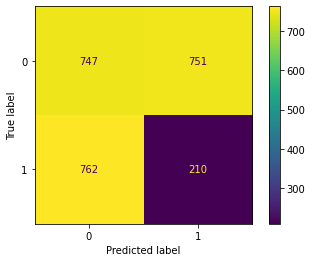

In [59]:
ConfusionMatrixDisplay.from_predictions(
    y_true=targets_test, y_pred=preds_test)

## Conclusion

## References

* Deep Autoencoding Gaussian Mixture Model for Unsupervised Anomaly Detection: [paper](https://openreview.net/forum?id=BJJLHbb0-).
* Differentiation of the Cholesky decomposition: [paper](https://arxiv.org/abs/1602.07527).
* A PyTorch implementation for the Deep Autoencoding Gaussian Mixture Model: [GitHub repository](https://github.com/mperezcarrasco/PyTorch-DAGMM).
* Another PyTorch implementation for the Deep Autoencoding Gaussian Mixture Model: [GitHub repository](https://github.com/lixiangwang/DAGMM-pytorch).
* Differentiating the Cholesky decomposition: [GitHub repository](https://github.com/imurray/chol-rev).
* An extended collection of matrix derivative results for forward and reverse mode algorithmic differentiation: [report](https://people.maths.ox.ac.uk/gilesm/files/NA-08-01.pdf).
* PyTorch: [documentation](https://pytorch.org/docs/stable/index.html).
* KDD Cup 1999 Data: [dataset](https://archive.ics.uci.edu/ml/datasets/kdd+cup+1999+data).
* Loading the KDD Cup 1999 dataset: [API](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_kddcup99.html).
